# Comparing the Numerical Bound vs. Blumer et al.'s Bound

This is a comparison of the numerical search using the lowest-order term using VC theory against the Blumer's statement of his bound. We'll also be using the figure we generate here in the paper.

In [1]:
%cd ~/Research/nonasymptotic-mp
from nbformat.json_compat import get_current_validator

from nonasymptotic.bound import compute_vol_unit_sphere, doubling_sample_search_over_log2_prob_bound, compute_sauer_shelah_bound_log2, compute_ss_comb_sum

import sympy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams.update({"text.usetex": True})

/home/seiji/Research/nonasymptotic-mp


In [2]:
# What we want: a plot of desired discrepancy vs. number of points for Halton and Blumer's proof technique at varying levels of probability.
d=2
n_curve_points = 1000

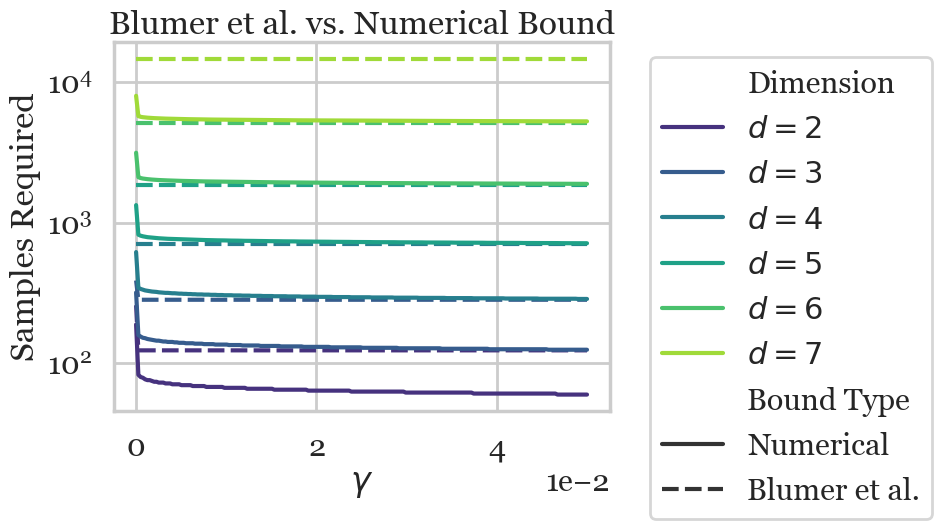

In [3]:
# this is blumer's bound verbatum
def blumer_bound(eps, gamma, vc_dim):
    return np.maximum(4 / eps * np.log2(2 / gamma), 8 * vc_dim / eps * np.log2(13 / eps))

def compare_bounds(_ps):
    results_record = {
        'Dimension': [],
        'probs': [],
        'n_samples': [],
        'Bound Type': []
    }

    for dim in dims:
        eps = compute_vol_unit_sphere(dim) * (rad ** dim)
        numer_samples = np.zeros_like(_ps)

        for i_p, _p in enumerate(_ps):
            numer_samples[i_p] = doubling_sample_search_over_log2_prob_bound(
                lambda _m : compute_sauer_shelah_bound_log2(_m, eps, dim + 1), 1 - _p
            )

        results_record['probs'] = np.concatenate([results_record['probs'], _ps])
        results_record['n_samples'] = np.concatenate([results_record['n_samples'], numer_samples])
        results_record['Bound Type'] = np.concatenate([results_record['Bound Type'], ['Numerical'] * len(_ps)])
        results_record['Dimension'] = np.concatenate([results_record['Dimension'], ['$d=' + str(dim) + '$'] * len(_ps)])


        blumer_samples = blumer_bound(eps, _ps, dim + 1)
        results_record['probs'] = np.concatenate([results_record['probs'], _ps])
        results_record['n_samples'] = np.concatenate([results_record['n_samples'], blumer_samples])
        results_record['Bound Type'] = np.concatenate([results_record['Bound Type'], ['Blumer et al.'] * len(_ps)])
        results_record['Dimension'] = np.concatenate([results_record['Dimension'], ['$d=' + str(dim) + '$'] * len(_ps)])
    
    return results_record

dims = [2, 3, 4, 5, 6, 7]
rad = 0.5
probs_small = np.linspace(0.05, 1e-15, num=200)
probs_large = np.linspace(1e-10, 1.0, num=500)

results_df = pd.DataFrame(compare_bounds(probs_small))
sns.set_theme(style='whitegrid', context='poster', font="Georgia")
ax = sns.lineplot(data=results_df, x='probs', y='n_samples', hue='Dimension', style='Bound Type', palette='viridis')
ax.set_yscale('log')
ax.set_xlabel('$\gamma$')
ax.set_ylabel('Samples Required')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
ax.set_title('Blumer et al. vs. Numerical Bound')
ax.ticklabel_format(axis='x', scilimits=(0, 0))

plt.savefig('blumer_numer.pdf', format='pdf', bbox_inches='tight')
plt.show()
